**Lab Task**

*Predicting Who Survived the Titanic Using Multilayer Perceptron (MLP)*

The goal of this lab task is to build a multilayer perceptron (MLP) classifier that can predict
whether a passenger survived the sinking of the Titanic or not.

1. Import the necessary Python libraries, such as pandas, numpy, and sklearn.
2. Load the Titanic dataset into a pandas DataFrame using pandas.read_csv().
3. Preprocess the data by converting categorical features into numerical ones, filling in
missing values, and scaling the numerical features using sklearn.preprocessing.
4. Split the dataset into training and test sets using
sklearn.model_selection.train_test_split().
5. Build an MLP classifier using sklearn.neural_network.MLPClassifier() and train it
on the training data.
6. Evaluate the performance of the MLP classifier on the test data using metrics such as
accuracy, precision, recall, and F1-score.
7. Fine-tune the MLP classifier by adjusting its hyperparameters, such as the number of
hidden layers, and the number of neurons per layer.
8. Evaluate the performance of the fine-tuned MLP classifier on the test data and compare
it to the initial model.
9. Discuss the results and insights gained from the experiment, and identify potential areas
for further improvement.

In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['titanic_train.csv']))
# Dataset is now stored in a Pandas Dataframe
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [ ]:
df.shape

(850, 15)

In [ ]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [ ]:
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [ ]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          0
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [ ]:
df.survived.value_counts()

0    537
1    313
Name: survived, dtype: int64

In [ ]:
df.embarked.value_counts()

2    589
0    176
1     84
3      1
Name: embarked, dtype: int64

In [ ]:
df.pclass.value_counts()

3    478
1    206
2    166
Name: pclass, dtype: int64

In [ ]:
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['embarked'] = label_encoder.fit_transform(df['embarked'].astype(str))
df.head()


,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",0,NaN,0,0,335432,7.7333,NaN,1,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",1,38.0,0,0,315089,8.6625,NaN,2,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",0,30.0,1,1,345773,24.1500,NaN,2,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",0,54.0,1,3,29105,23.0000,NaN,2,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",1,40.0,0,0,28221,13.0000,NaN,2,NaN,NaN,"Barre, Co Washington, VT",0


In [ ]:
# Select features and target variable
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

In [ ]:
X.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0,NaN,0,0,7.7333,1
1,3,1,38.0,0,0,8.6625,2
2,3,0,30.0,1,1,24.1500,2
3,2,0,54.0,1,3,23.0000,2
4,2,1,40.0,0,0,13.0000,2
5,3,1,28.0,0,0,22.5250,2
6,3,1,19.0,0,0,0.0000,2
7,2,0,30.0,0,0,13.0000,2
8,3,0,22.0,0,0,7.7750,2
9,3,0,21.0,1,0,9.8250,2


In [ ]:
X.isnull().sum()

pclass        0
sex           0
age         174
sibsp         0
parch         0
fare          1
embarked      0
dtype: int64

In [ ]:
#df["age"] = df["age"].fillna(df["age"].mean())

In [ ]:
X.fillna(X.mean(), inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    850 non-null    int64  
 1   sex       850 non-null    int64  
 2   age       850 non-null    float64
 3   sibsp     850 non-null    int64  
 4   parch     850 non-null    int64  
 5   fare      850 non-null    float64
 6   embarked  850 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 46.6 KB


In [ ]:
scaler = StandardScaler()

column = ['age', 'sibsp', 'parch', 'fare']
X[column] = scaler.fit_transform(X[column])

In [ ]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0,2.737723e-16,-0.469963,-0.434989,-0.489898,1
1,3,1,6.534810e-01,-0.469963,-0.434989,-0.472576,2
2,3,0,3.700060e-02,0.429741,0.702675,-0.183860,2
3,2,0,1.886442e+00,0.429741,2.978005,-0.205298,2
4,2,1,8.076011e-01,-0.469963,-0.434989,-0.391717,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked
476,2,0,-1.966561,1.329444,0.702675,0.092973,2
411,3,1,-0.502420,-0.469963,-0.434989,-0.502636,2
377,1,0,-0.810660,-0.469963,1.840340,-0.144091,2


In [ ]:
X_test.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked
780,3,1,2.737723e-16,-0.469963,-0.434989,-0.471644,2
233,3,1,2.737723e-16,-0.469963,-0.434989,0.419128,2
68,3,1,-4.005945e-02,-0.469963,-0.434989,-0.457275,2


In [ ]:
y_train.value_counts()


0    425
1    255
Name: survived, dtype: int64

In [ ]:
y_test.value_counts()

0    112
1     58
Name: survived, dtype: int64

In [ ]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,6), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

**Before Fine tunning**

In [ ]:
print('Accuracy score:', round(accuracy_score(y_test, y_pred),2))
print('Precision score:', round(precision_score(y_test, y_pred),2))
print('Recall score:', round(recall_score(y_test, y_pred),2))
print('F1 score:', round( f1_score(y_test, y_pred),2))

Accuracy score: 0.78
Precision score: 0.75
Recall score: 0.52
F1 score: 0.61


In [ ]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,8), max_iter=1500, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [ ]:
print('Accuracy score:', round(accuracy_score(y_test, y_pred),2))
print('Precision score:', round(precision_score(y_test, y_pred),2))
print('Recall score:', round(recall_score(y_test, y_pred),2))
print('F1 score:', round( f1_score(y_test, y_pred),2))

Accuracy score: 0.79
Precision score: 0.78
Recall score: 0.55
F1 score: 0.65


In [ ]:
Xlim = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']]

<AxesSubplot:xlabel='sex', ylabel='survived'>

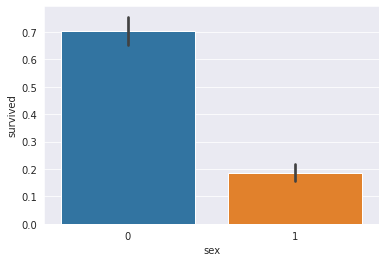

In [ ]:
sns.barplot(data=Xlim, x="sex", y="survived")

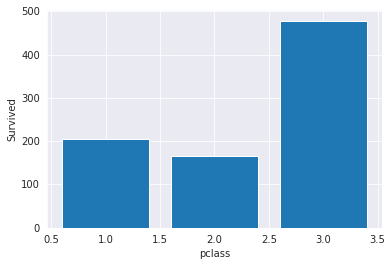

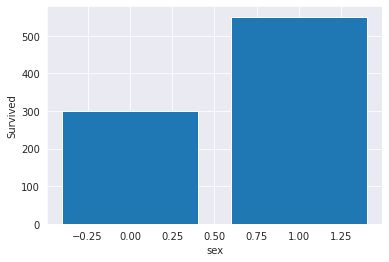

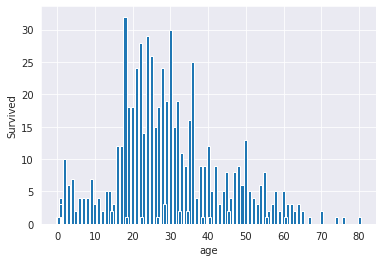

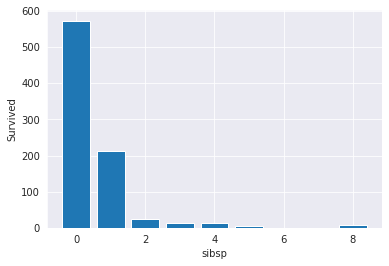

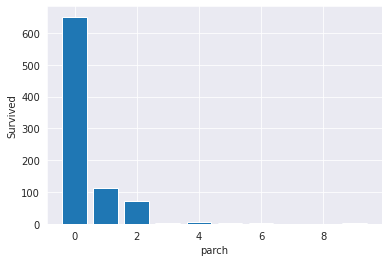

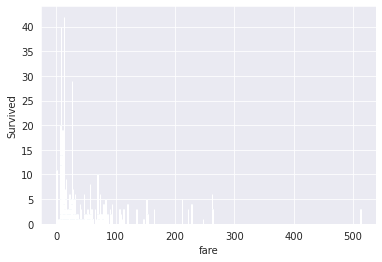

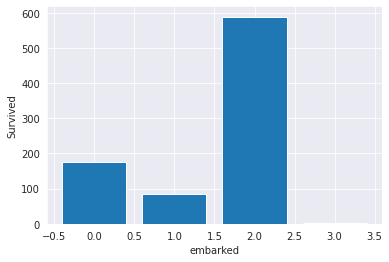

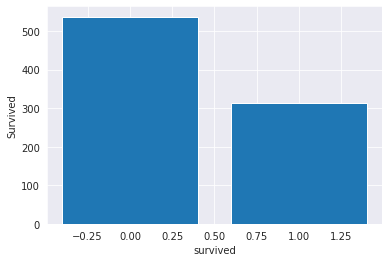

In [ ]:
for column in Xlim.columns:
        fig, ax = plt.subplots()
        ax.bar(df[column].value_counts().index, df[column].value_counts().values)
        ax.set_xlabel(column)
        ax.set_ylabel('Survived')
        plt.show()